# Projeto do Módulo de Estatística

Atividade final do módulo de Estatística do curso de Data Science da Let's Code.

Elaborado por:

 - Victor Taveira
 - George Sousa
 - Diolan Godinho

Docente responsável:

 - Walisson Silva

## Carregamento de bibliotecas

In [144]:
#  Ferramentas Gerais
import pandas as pd 
import numpy  as np

In [145]:
# Ferramentas de Visualização

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

In [146]:
# Ferramentas Estatísticas e de Modelagem

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error as MAE, mean_squared_error as MSE
from scipy.stats import normaltest, norm, t as t_student
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Contextualização

<em>
A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país. 

A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas. 

Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.
</em>

In [147]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

Os únicos dados faltantes no dataframe se encontram em apenas duas colunas e exatamente nas mesmas observações.

In [149]:
(df['Household Head Occupation'].isna() == df['Household Head Class of Worker'].isna()).all()

True

Observamos que <span style="color:orange; font-size:2em;">77%</span> das famílias registradas no dataframe possuem um total de <span style="color:orange">despesas maior do que a renda</span>.

In [150]:
total_expenditure = df.filter(like='Expenditure', axis=1).sum(axis=1)

total_expenditure.rename('Total Household Expenditure', inplace=True)

total_expenditure

In [151]:
total_income = df['Total Household Income']
total_income

In [152]:
porcentagem_endividados = (total_expenditure > total_income).sum() / len(total_income.index)
print(f'A porcentagem de famílias endividadas é de {porcentagem_endividados:.2f}%') 

A porcentagem de famílias endividadas é de 0.77%


## Milestone 1 - Amostra e Descrição

### M1.1
*Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.*

Para calcular o tamanho amostral vamos usar a equação abaixo, derivada do teorema do limite central,

$$n = \left(\frac{z_{\alpha}\sigma}{\epsilon }\right) ^2 $$

In [153]:
confianca = 0.95

significancia = 1 - confianca

erro_maximo = 500

z_alpha = norm.ppf(confianca + significancia/2)

dp_pop = df['Medical Care Expenditure'].std(ddof=1)

n = int(np.ceil((z_alpha * dp_pop / erro_maximo) ** 2))

n

11121

Verificando:

In [154]:
erro_n = z_alpha * dp_pop / np.sqrt(n)


erro_n

499.9893752767934

### M1.2
*Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.*

Obtendo uma amostra de tamanho 11121 dos dados.

In [155]:
df_amostra = df.sample(n, random_state=101)
df_amostra

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1849,162566,V - Bicol Region,85025,Enterpreneurial Activities,1,28108,22932,3614,10058,3750,...,0,0,0,0,0,3,0,0,0,0
29179,218765,IVA - CALABARZON,71775,Other sources of Income,0,30273,20091,7180,4092,1300,...,1,0,0,0,0,3,0,0,0,0
20513,551982,NCR,214203,Wage/Salaries,0,21228,12326,48055,17536,660,...,1,1,0,0,0,3,2,0,0,0
28910,443465,I - Ilocos Region,223936,Other sources of Income,0,66348,51000,36404,12411,2172,...,1,1,0,0,0,3,1,0,0,1
2162,144350,ARMM,80055,Enterpreneurial Activities,1,31586,24864,280,15975,2798,...,0,0,0,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18888,118793,VIII - Eastern Visayas,45416,Wage/Salaries,1,23374,22182,3090,2895,435,...,0,0,0,0,0,0,0,0,0,1
40355,240046,VIII - Eastern Visayas,111816,Wage/Salaries,2,39623,32218,17436,13978,1085,...,1,1,0,0,0,4,0,0,0,0
20438,50370,ARMM,50501,Enterpreneurial Activities,0,13568,9705,865,3024,980,...,0,0,0,0,0,0,0,0,0,0
11603,194088,XI - Davao Region,109826,Wage/Salaries,0,37156,21449,21934,9248,505,...,0,0,0,0,0,1,0,0,0,1


A lista a seguir é composta pelas 10 variáveis quantitativas por nós escolhidas.

In [33]:
features = [
    'Total Household Income',
    'Total Rice Expenditure',
    'Total Food Expenditure',
    'Tobacco Expenditure',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Education Expenditure',
    'Household Head Age',
    'Total Number of Family members',
    'Number of Cellular phone'
]

In [34]:
df_10_quant_features = df_amostra[features]

df_10_quant_features.describe(percentiles=np.linspace(0.1, 0.9, 9)).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Total Household Income,8773.0,249057.720506,280153.328749,12141.0,71449.4,94496.6,115753.2,138899.0,164192.0,202113.4,257093.4,341142.0,509364.0,6452314.0
Total Rice Expenditure,8773.0,18244.643224,12514.582890,0.0,6188.0,9737.2,12105.6,14215.2,16588.0,19240.0,22200.0,25600.0,31257.6,429640.0
Total Food Expenditure,8773.0,85707.479539,52196.660586,5408.0,35482.2,46581.6,55308.4,64322.0,73448.0,84336.8,97888.2,116897.0,148801.6,656954.0
Tobacco Expenditure,8773.0,2304.274706,4039.460672,0.0,0.0,0.0,0.0,0.0,260.0,1086.0,2172.0,4073.0,7240.0,73881.0
Medical Care Expenditure,8773.0,7048.729967,24431.217835,0.0,100.0,230.0,417.0,692.8,1148.0,1998.2,3391.0,6449.2,15562.0,1038512.0
Transportation Expenditure,8773.0,11969.704548,18716.462210,0.0,1008.0,1886.4,2988.0,4320.0,6042.0,8436.0,11598.0,16893.6,28440.0,396540.0
Education Expenditure,8773.0,7416.213610,19548.068701,0.0,0.0,0.0,50.0,470.0,874.0,1420.0,2588.2,7680.0,21848.0,410000.0
Household Head Age,8773.0,51.208823,14.229462,15.0,33.0,38.0,43.0,47.0,50.0,54.0,59.0,63.0,70.0,98.0
Total Number of Family members,8773.0,4.629773,2.297511,1.0,2.0,3.0,3.0,4.0,4.0,5.0,6.0,6.0,8.0,26.0
Number of Cellular phone,8773.0,1.919640,1.584249,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,10.0


Vamos fazer uma análise descritiva de cada uma delas.

In [37]:
def create_histogram(data):
    plt.figure(figsize=(13,7))
    hist = sns.histplot(data, kde=True)
    hist.set_title(f'Distribuction of {data.name}', loc='left', fontsize=18)
    plt.vlines(data.mean(), 0, hist.dataLim.y1, linewidth=2, linestyle='--', color='orange', label='Mean')
    plt.legend()
    plt.show()

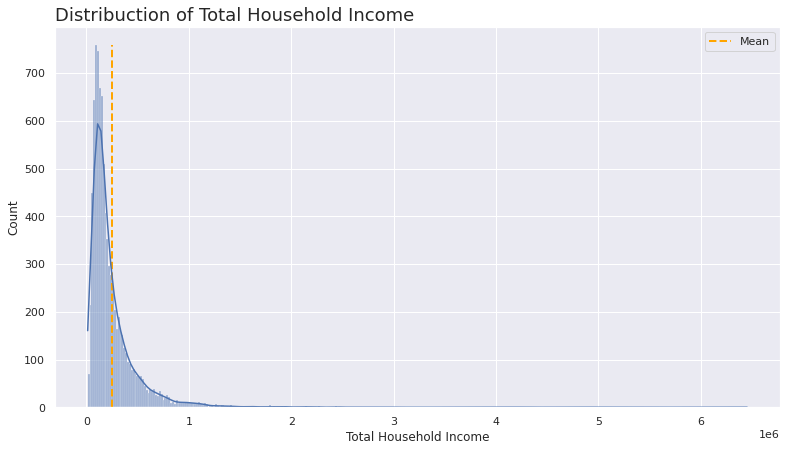

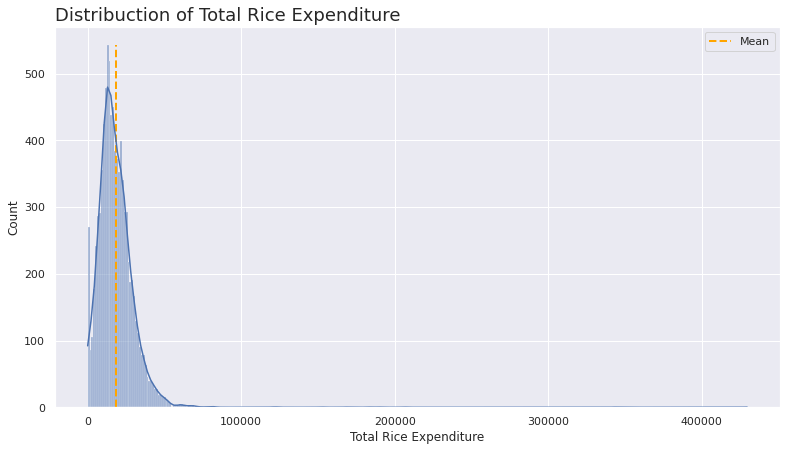

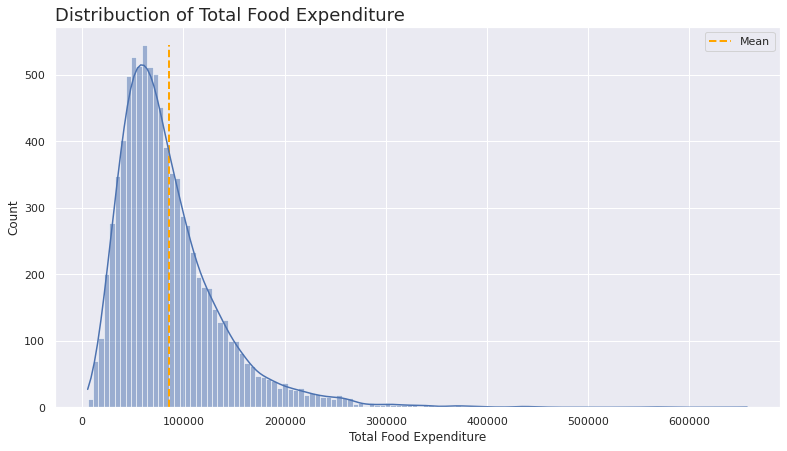

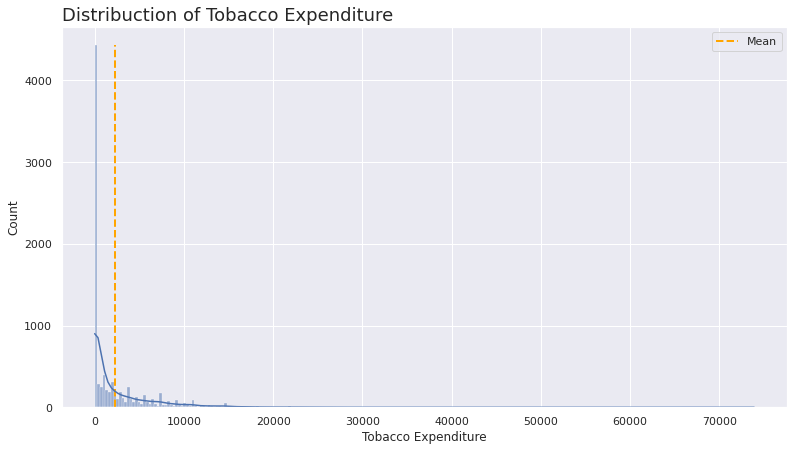

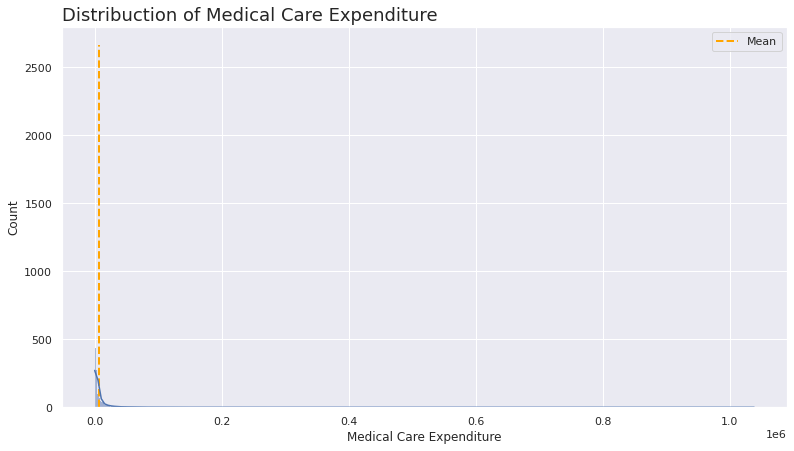

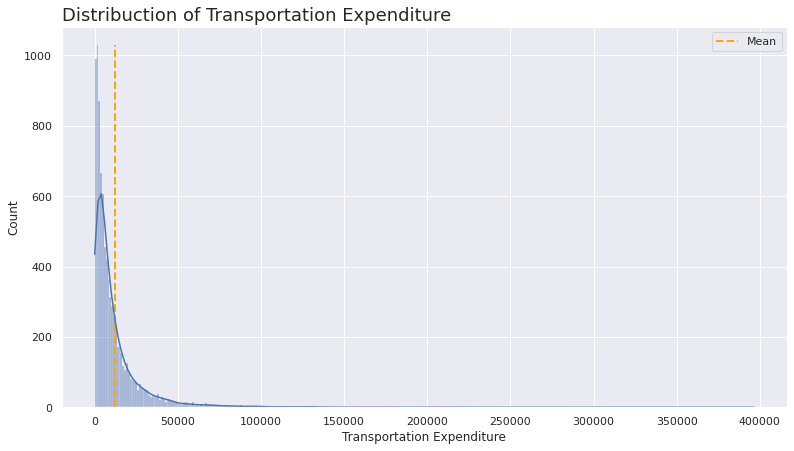

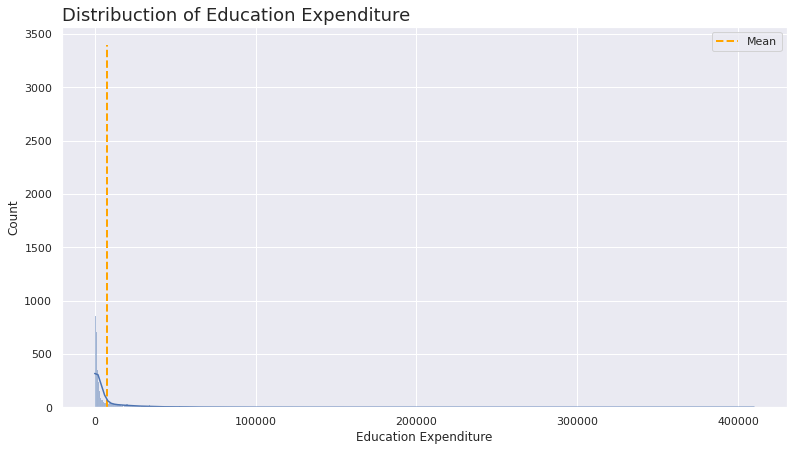

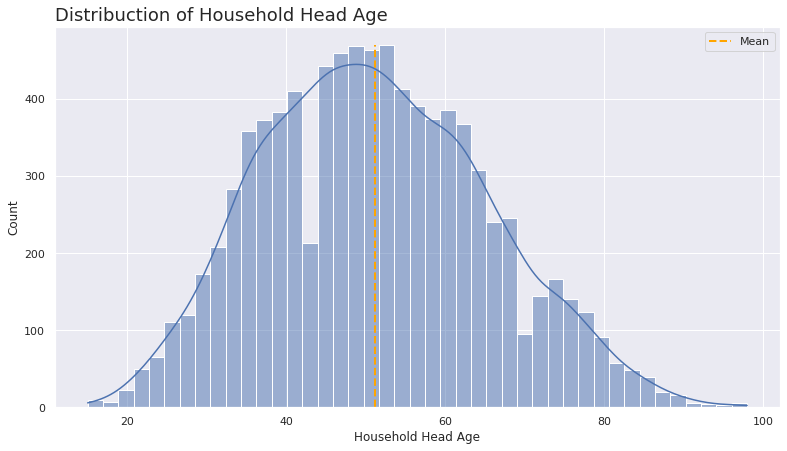

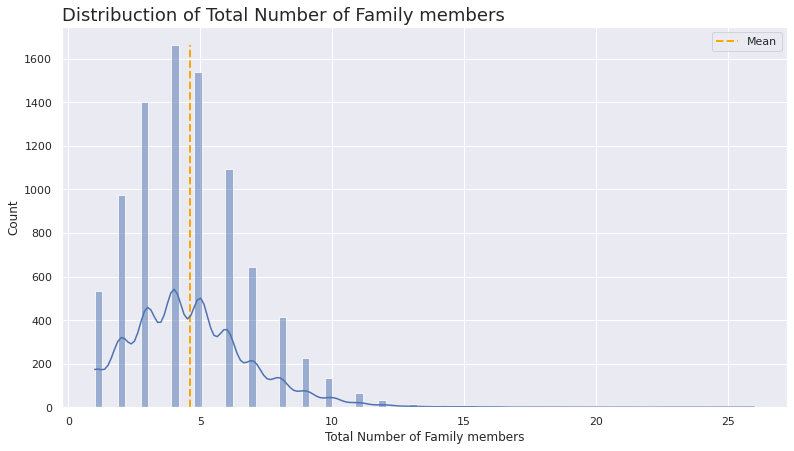

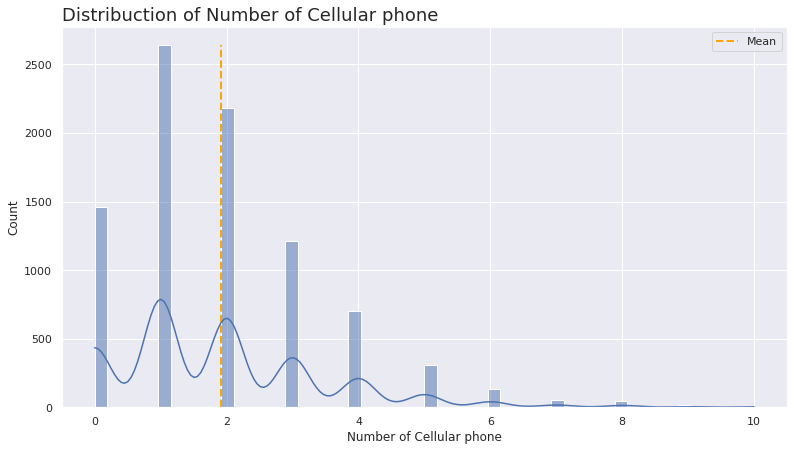

In [38]:
for feature in features:
    create_histogram(df_10_quant_features[feature])
    # A gente tem q ver depois como fazer pra corrigir a curva nos últimos 2 gráficos!

## Milestone 2 - Inferência Estatística

Considere “Enteroreneurial activities” e “other sources of income” como "outros".

### M2.1

*Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).*

Vamos salvar a soma das despesas em questão e calcular o desvio-padrão populacional.

In [156]:
despesa_saude_educa_pop = df['Medical Care Expenditure'] + df['Education Expenditure']
dp_pop = despesa_saude_educa_pop.std()

Vamos agora fazer o mesmo, porém com a amostra selecionada anteriormente.

In [157]:
despesa_saude_educa = df_amostra['Medical Care Expenditure'] + df_amostra['Education Expenditure']
despesa_saude_educa

Calculando a média e o desvio-padrão amostrais.

In [159]:
media = despesa_saude_educa.mean()

dp = despesa_saude_educa.std(ddof=1)

media, dp

(14426.351137487636, 33193.57276461579)

Utilizando a confiança fornecida no enunciado e os demais dados que obtvemos vamos calcular o intervalo de confiança para a média de gastos com saúde e educação.

In [161]:
confianca = 0.95

significancia = 0.05

z_alpha = norm.ppf(confianca + significancia/2)

erro_padrao = dp / np.sqrt(n)

erro_inferencial = z_alpha * erro_padrao

intervalo = (media - erro_inferencial, media + erro_inferencial)

intervalo

(13809.429261548154, 15043.273013427119)

Conferindo nosso cálculo com a função nativa do "norm".

In [160]:
erro_padrao2 = dp_pop / np.sqrt(n)
norm.interval(confianca, loc=media, scale=erro_padrao2)

(13762.630972035966, 15090.071302939306)

### M2.2

*Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.*

Essa análise seguirá o roteiro de filtrar os dados para criar dois dataframes  mostram discriminadamente a quantidade de membros familiares em lares liderados por homens e mulheres

In [87]:
dados_homens = df.query('`Household Head Sex` == "Male"')
dados_homens 

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
5,152883,CAR,73326,Wage/Salaries,0,29065,25190,15336,8572,2614,...,0,1,0,0,0,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [88]:
dados_mulheres= df.query('`Household Head Sex` == "Female" ')
dados_mulheres

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
8,171152,CAR,67348,Other sources of Income,0,23117,15845,11464,6685,1370,...,0,0,0,0,0,2,0,0,0,0
15,171742,CAR,70892,Other sources of Income,0,30594,26788,10336,7900,1503,...,0,0,0,0,0,0,0,0,0,0
18,88170,CAR,64705,Enterpreneurial Activities,1,31984,28659,8048,7625,1625,...,0,0,0,0,0,1,0,0,0,0
28,87612,CAR,88484,Enterpreneurial Activities,0,41313,36563,15018,11071,2210,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,255700,XII - SOCCSKSARGEN,33321,Other sources of Income,2,8196,6006,2496,3860,856,...,1,1,1,0,0,3,0,0,0,0
41521,267330,XII - SOCCSKSARGEN,71609,Other sources of Income,2,22668,17370,5085,12217,4804,...,0,0,0,0,0,2,0,0,0,0
41526,99500,XII - SOCCSKSARGEN,66595,Other sources of Income,2,33240,28312,1545,5710,1727,...,0,0,0,0,0,2,0,0,0,0
41529,95500,XII - SOCCSKSARGEN,73138,Wage/Salaries,2,29676,25296,1445,11415,2002,...,0,0,0,0,0,2,0,0,0,0


In [89]:
exp_0 = dados_homens['Total Number of Family members']
exp_0

In [90]:
exp_1 = dados_mulheres['Total Number of Family members']
exp_1

In [91]:
confianca = 0.95
significancia = 1 - confianca
N_homens = len(exp_0)
N_mulheres = len(exp_1)
D0 = 0
gl = N_homens + N_mulheres - 2

In [92]:
media_homens = exp_0.mean()
desvio_homens = exp_0.std(ddof= 1)
media_homens, desvio_homens

(4.850044638734107, 2.244632971364186)

In [93]:
media_mulheres = exp_1.mean()
desvio_mulheres = exp_1.std(ddof= 1)
N_mulheres = len(exp_1)
media_mulheres, desvio_mulheres

(3.8649155722326456, 2.2403252055305822)

A proposta do teste será comparar a média de membros familiares reltiva aos homens (u0) e às mulheres (u1). 
* $H_{0}$ : u0 - u1 = 0 ( as médias entre os sexos são iguais )

* $H_{1}$ : u0 - u1 $\ne$ 0 ( as médias são diferentes, como requisitado no enunciado) 

In [94]:
num = media_homens - media_mulheres - D0
den = np.sqrt(((desvio_homens**2)/N_homens)+((desvio_mulheres**2)/N_mulheres))


num , den

(0.9851290665014614, 0.026627556944691187)

In [95]:
t = num / den
t

36.996599746183975

In [96]:
p_valor_0 = t_student.sf(t,gl)
p_valor_0

4.0836475270533485e-295

In [97]:
if p_valor_0 <= significancia:
    print('Rejeita H0')
else:
    print('Rejieta H1')

Rejeita H0


A conclusão do teste rejeitando **$H_{0}$** mostrando que a média da quantidade de  familiares liderados por mulheres é diferente dos lares liderados por homens nas Philipinas.

### M2.3
Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

In [98]:
salario = df.query('`Main Source of Income` == "Wage/Salaries" ')['Total Household Income']
salario

In [99]:
outros = df.query('`Main Source of Income` != "Wage/Salaries" ')['Total Household Income']
outros

A proposta do teste será comparar a média total de renda familiar advinda de saláriio (u1) e advinda de outras formas (u2). 
* $H_{0}$ : u0 - u1 = 0 ( as médias entre salário e outras fontes são igiaus )

* $H_{1}$ : u0 - u1 $\ne$ 0 ( as médias são diferentes, como requisitado no enunciado) 

In [100]:
confianca = 0.95
significancia = 1 - confianca

In [101]:
media_salario = salario.mean()
std_salario = salario.std(ddof = 1)
N_salario = len(salario)

print(media_salario, std_salario, N_salario)

267414.9520796547 252468.9529838919 20388


In [102]:
media_outros = outros.mean()
std_outros = outros.std(ddof = 1)
N_outros = len(outros)

print(media_outros, std_outros, N_outros)

228417.14747589338 315347.43837889633 21156


In [103]:
gl = N_salario + N_outros - 2
D0 = 0
print(gl,D0)

41542 0


In [104]:
num = media_salario - media_outros - D0
den = np.sqrt(((std_salario**2)/N_salario)+((std_outros**2)/N_outros))

t2 = num / den 
print(num , den, t2)

38997.804603761295 2797.657541309958 13.939448995426796


In [105]:
pvalor_1 = t_student.sf(t2,gl)
pvalor_2 = t_student.cdf(t2,gl)
pvalor = min(pvalor_2 ,pvalor_1)
print(pvalor_1,pvalor_2,pvalor)

2.2926699700403175e-44 1.0 2.2926699700403175e-44


In [106]:
if pvalor<= significancia:
    print('Rejeita H0')
else:
    print('Rejieta H1')

Rejeita H0


**Conclusão:**
- O teste no indica que a média remuneratória obtida por salário é diferente da obtida por outras rendas. 

In [107]:
# fazendo o teste para ver se u0 é maior que u1
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [108]:
teste_salario = DescrStatsW(salario)
print(teste_salario)

In [109]:
teste_outros = DescrStatsW(outros)
repr(teste_outros)

'<statsmodels.stats.weightstats.DescrStatsW object at 0x7f41d44a7520>'

In [110]:
teste = CompareMeans(teste_salario, teste_outros)

In [111]:
teste.ttest_ind(alternative = 'larger', value = 0)

(13.883180648127368, 5.017036347854192e-44, 41542.0)

In [112]:
teste.ttest_ind(alternative = 'smaller', value = 0)

(13.883180648127368, 1.0, 41542.0)

In [113]:
teste2 = CompareMeans(teste_outros, teste_salario)

In [114]:
teste2.ttest_ind(alternative = 'larger', value = 0)

(-13.883180648127368, 1.0, 41542.0)

In [115]:
teste2.ttest_ind(alternative = 'smaller', value = 0)

(-13.883180648127368, 5.017036347854192e-44, 41542.0)

In [116]:
print(df['Main Source of Income'].value_counts())

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64


Como podemos ver pelos testes, as famílias nas quais salários são a principal fonte de renda tem renda média superior ao grupo outros que incluem Enterpreneurial Activities e Other sources of Income. 

## Milestone 3 - Previsão de Renda Com Regressão Linear

### M3.1
Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.

In [117]:
# Usamos o 'get_dummies' para usar as colunas categóricas no nosso modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
df_dummies = pd.get_dummies(df)
df_dummies.shape

(41544, 555)

<AxesSubplot:>

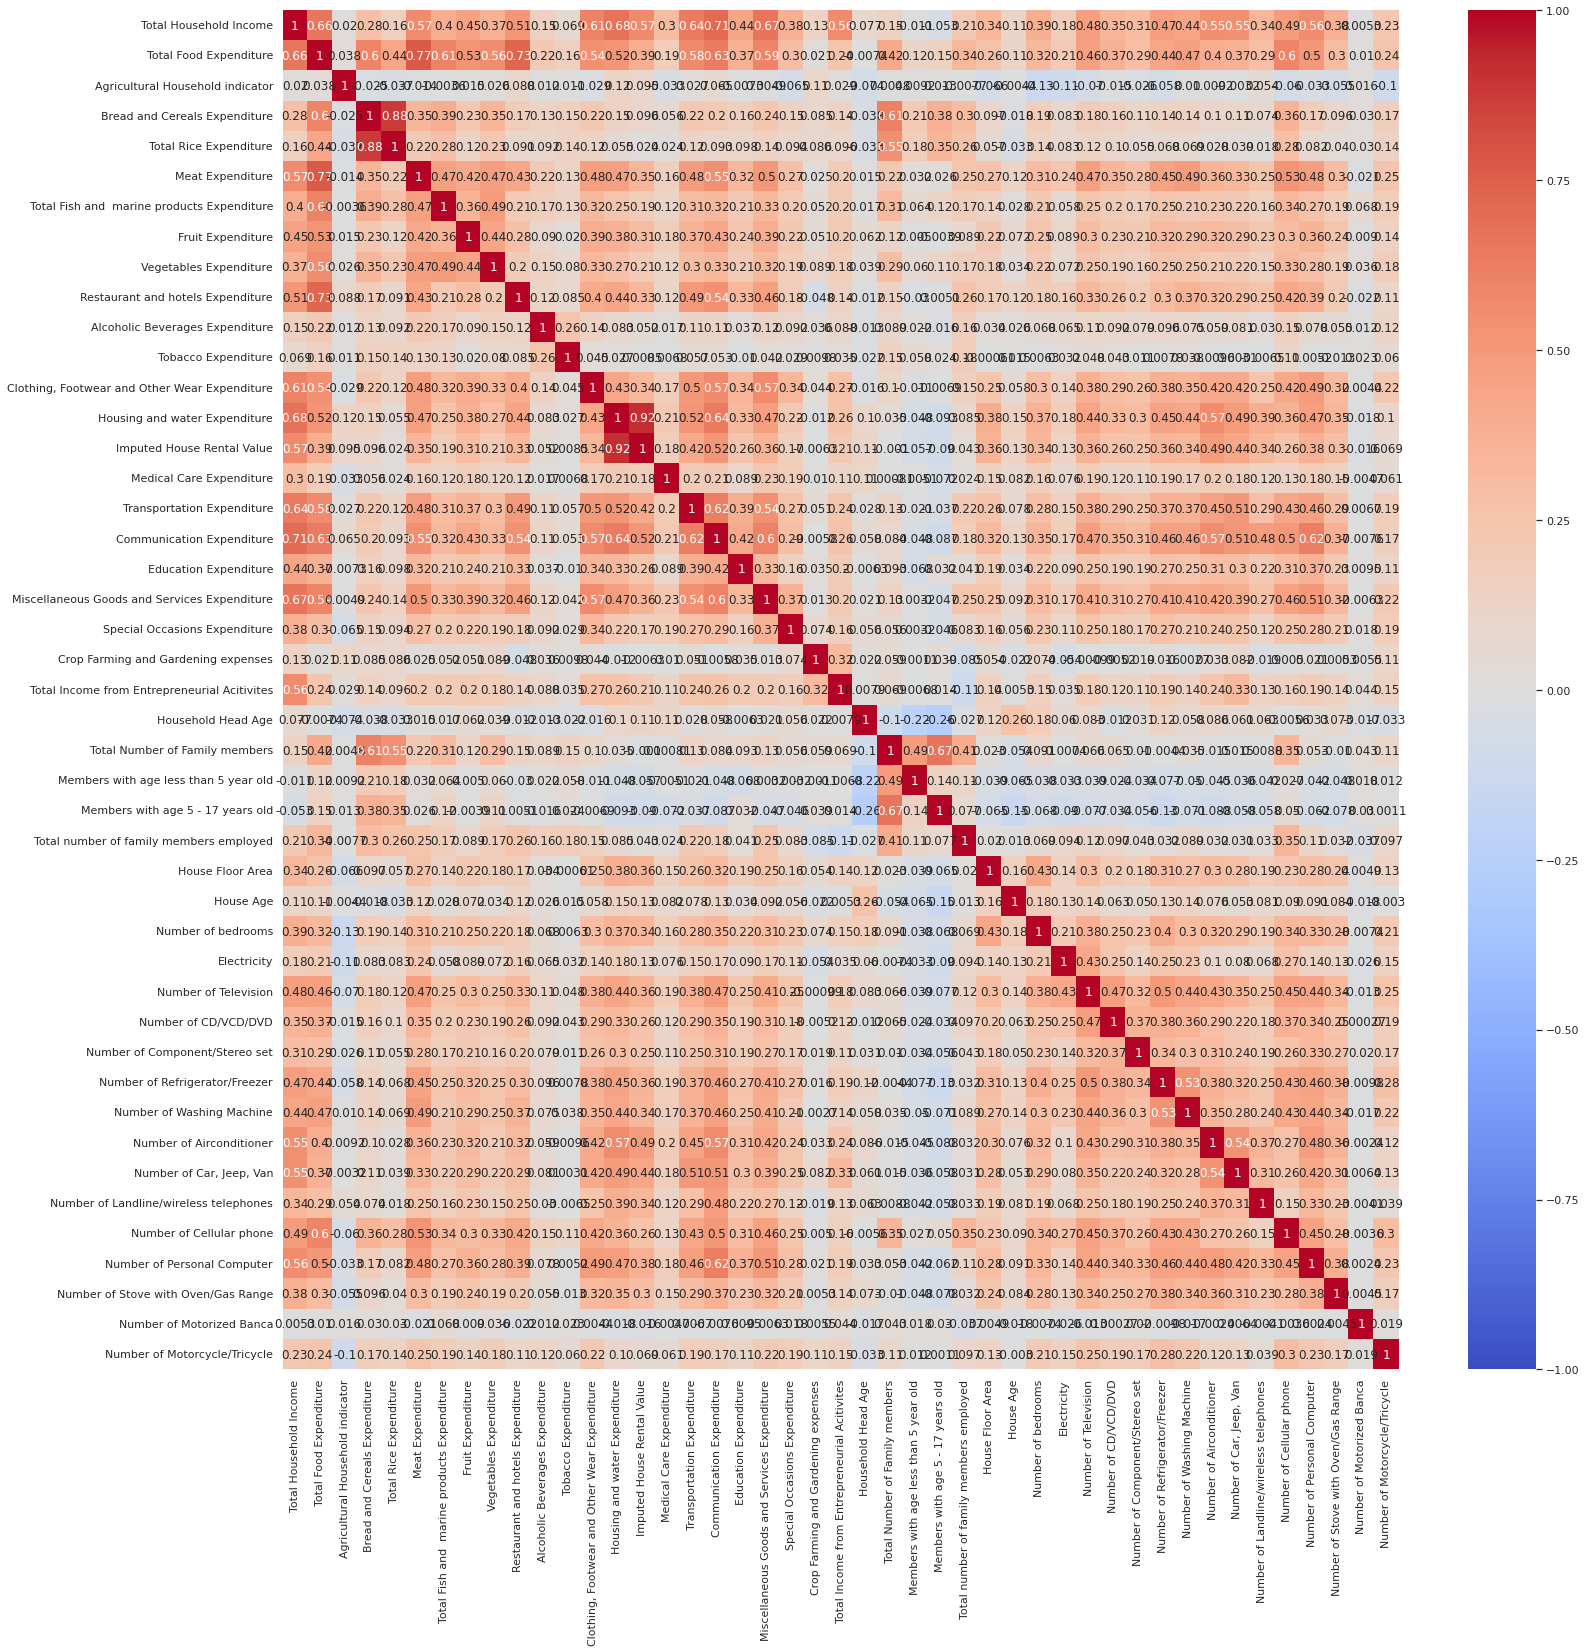

In [142]:
# Tentamos observar a correleção das colunas também, mas não obtivemos nenhum insight relevante para o problema.
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='Imputed House Rental Value', ylabel='Total Household Income'>

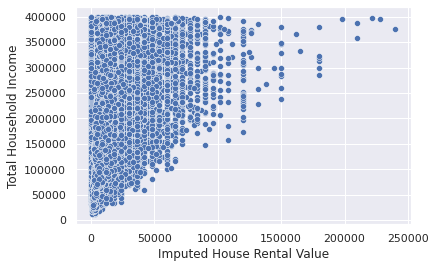

In [118]:
# Tentamos observar a correlação entre algumas colunas com a 'Total Household Income', mas não obtivemos uma informação muito útil
sns.scatterplot(data=df_dummies[(df_dummies['Total Household Income'] < 400000)],x='Imputed House Rental Value',y='Total Household Income')

In [126]:
# Nosso modelo usando todas as colunas do dataset, obtendo um r2 de 0.827
X = df_dummies.drop('Total Household Income',axis=1)
y = df_dummies['Total Household Income']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

x = sm.add_constant(X_train)
model_initial = sm.OLS(y_train, x).fit()
model_initial.summary()

OLS Regression Results 
 
 Dep. Variable: Total Household Income R-squared: 0.827 
 
 
 Model: OLS Adj. R-squared: 0.824 
 
 
 Method: Least Squares F-statistic: 261.7 
 
 
 Date: Wed, 22 Dec 2021 Prob (F-statistic): 0.00 
 
 
 Time: 23:26:08 Log-Likelihood: -3.8140e+05 
 
 
 No. Observations: 29080 AIC: 7.639e+05 
 
 
 Df Residuals: 28558 BIC: 7.682e+05 
 
 
 Df Model: 521 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1446.5979 7718.405 0.187 0.851 -1.37e+04 1.66e+04 
 
 
 Total Food Expenditure 0.5292 0.076 6.962 0.000 0.380 0.678 
 
 
 Agricultural Household indicator -697.3946 1666.155 -0.419 0.676 -3963.136 2568.347 
 
 
 Bread and Cereals Expenditure -0.1593 0.160 -0.997 0.319 -0.473 0.154 
 
 
 Total Rice Expenditure -0.1279 0.139 -0.921 0.357 -0.400 0.144 
 
 
 Meat Expenditure 0.1052 0.144 0.728 0.467 -0.178 0.388 
 
 
 Total Fish and marine products Expenditure 1.0250 0.149 6.874 0.000 0.733 1.317 
 
 
 Fruit Expenditure -0.0466 0.300 -0.155 0.877 -0.635 0.542 
 
 
 Vegetables Expenditure -0.7847 0.304 -2.581 0.010 -1.381 -0.189 
 
 
 Restaurant and hotels Expenditure 0.2134 0.083 2.569 0.010 0.051 0.376 
 
 
 Alcoholic Beverages Expenditure 0.6097 0.355 1.717 0.086 -0.086 1.306 
 
 
 Tobacco Expenditure 0.2256 0.194 1.164 0.244 -0.154 0.605 
 
 
 Clothing, Footwear and Other Wear Expenditure 1.4688 0.136 10.789 0.000 1.202 1.736 
 
 
 Housing and water Expenditure 0.7157 0.049 14.711 0.000 0.620 0.811 
 
 
 Imputed House Rental Value 0.4264 0.057 7.499 0.000 0.315 0.538 
 
 
 Medical Care Expenditure 0.7181 0.028 25.827 0.000 0.664 0.773 
 
 
 Transportation Expenditure 0.9754 0.053 18.374 0.000 0.871 1.079 
 
 
 Communication Expenditure 4.6283 0.185 25.065 0.000 4.266 4.990 
 
 
 Education Expenditure 0.8506 0.039 21.836 0.000 0.774 0.927 
 
 
 Miscellaneous Goods and Services Expenditure 2.4417 0.063 38.912 0.000 2.319 2.565 
 
 
 Special Occasions Expenditure 1.1650 0.060 19.452 0.000 1.048 1.282 
 
 
 Crop Farming and Gardening expenses 0.1265 0.017 7.276 0.000 0.092 0.161 
 
 
 Total Income from Entrepreneurial Acitivites 0.7619 0.006 122.205 0.000 0.750 0.774 
 
 
 Household Head Age 426.5339 74.458 5.729 0.000 280.593 572.474 
 
 
 Total Number of Family members -1374.6771 816.665 -1.683 0.092 -2975.379 226.025 
 
 
 Members with age less than 5 year old 5085.3214 1474.069 3.450 0.001 2196.077 7974.566 
 
 
 Members with age 5 - 17 years old -1532.8698 907.700 -1.689 0.091 -3312.004 246.265 
 
 
 Total number of family members employed 2.107e+04 959.682 21.957 0.000 1.92e+04 2.3e+04 
 
 
 House Floor Area 18.4635 15.388 1.200 0.230 -11.697 48.624 
 
 
 House Age -106.8614 55.232 -1.935 0.053 -215.120 1.397 
 
 
 Number of bedrooms 2799.3480 845.405 3.311 0.001 1142.315 4456.381 
 
 
 Electricity -6726.4368 2875.722 -2.339 0.019 -1.24e+04 -1089.886 
 
 
 Number of Television 3397.4921 1605.763 2.116 0.034 250.121 6544.863 
 
 
 Number of CD/VCD/DVD -2347.1941 1576.036 -1.489 0.136 -5436.299 741.911 
 
 
 Number of Component/Stereo set -4077.8171 2140.744 -1.905 0.057 -8273.776 118.142 
 
 
 Number of Refrigerator/Freezer 3185.8554 1884.169 1.691 0.091 -507.205 6878.916 
 
 
 Number of Washing Machine -605.5740 2059.676 -0.294 0.769 -4642.636 3431.488 
 
 
 Number of Airconditioner 2.163e+04 2280.313 9.484 0.000 1.72e+04 2.61e+04 
 
 
 Number of Car, Jeep, Van 1.785e+04 2864.745 6.232 0.000 1.22e+04 2.35e+04 
 
 
 Number of Landline/wireless telephones -1.327e+04 3077.826 -4.313 0.000 -1.93e+04 -7242.142 
 
 
 Number of Cellular phone 1.1851 700.516 0.002 0.999 -1371.859 1374.230 
 
 
 Number of Personal Computer 9364.4388 1395.087 6.712 0.000 6630.002 1.21e+04 
 
 
 Number of Stove with Oven/Gas Range 8922.6733 2388.301 3.736 0.000 4241.490 1.36e+04 
 
 
 Number of Motorized Banca -4657.9663 5881.004 -0.792 0.428 -1.62e+04 6869.078 
 
 
 Number of Motorcycle/Tricycle 4395.2594 1483.151 2.963 0.003 1488.214 7302.305 
 
 
 Region_ ARMM 1.305e+04 3822.291 3.415 0.001 5

In [127]:
# Observando os resíduos do modelo acima, percebemos que existem algums outliers notáveis, mas que mesmo testando várias estratégias,
# não conseguimos criar um modelo sem outliers em seus resíduos.
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

resid = y_test - y_pred

sns.scatterplot(y_test,resid)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Household Income', ylabel='Total Household Income'>

In [128]:
# Padronizando os dados para aplicar o PCA (Como o PCA não pode ser utilizado, comentei esse bloco de código)
# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [129]:
# Tentamos aplicar o PCA, mas desistimos da ideia depois de 25 minutos de tempo execução.
# pca = PCA(n_components=0.95)

# pca.fit(X_train)

# X_train = pca.transform(X_train)

# X_test = pca.transform(X_test)

In [139]:
# Usamos essa função para remover os outliers
# Primeiramente tentamos remover os outliers de todas as colunas, mas acabamos ficando com apenas 2500 linhas.
# Decidimos então remover apenas os ouliers da coluna que queremos prever, usando apenas os dados de treino.
def calc_inf_sup_interval(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = max(Q1 - 1.5 * IQR,dados_coluna.min())
    sup = min(Q3 + 1.5 * IQR,dados_coluna.max())

    return inf, sup

df_treino_sem_outliers = pd.concat([X_train,y_train], axis=1)

coluna_y = ['Total Household Income']

for coluna in coluna_y:
    inf, sup = calc_inf_sup_interval(df_treino_sem_outliers[coluna])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df_treino_sem_outliers = df_treino_sem_outliers[(df_treino_sem_outliers[coluna] >= inf) & (df_treino_sem_outliers[coluna] <= sup)]

In [132]:
df_treino_sem_outliers

,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,...,Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc",Total Household Income
15643,110425,0,26533,23640,18270,20862,1370,8383,19150,2340,...,0,0,0,0,0,0,0,0,0,144825
26790,66763,1,31946,24385,3875,20611,650,3320,2414,910,...,0,0,0,0,0,0,1,0,0,158025
12007,38530,0,12386,9984,7280,3820,2750,3471,1300,0,...,0,1,0,0,0,0,0,0,0,133904
1769,99592,0,14529,10018,12150,9432,2170,3555,20880,0,...,0,0,0,0,0,1,0,0,0,181893
36952,182676,2,33753,22880,33838,13608,3207,10927,36950,0,...,0,1,0,0,0,0,0,0,0,401004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,61641,1,22229,15600,2924,12446,1963,4948,7240,0,...,0,0,0,0,0,0,0,0,0,100305
12363,20484,1,8085,0,1940,2995,250,1711,0,0,...,0,0,0,0,0,1,0,0,0,49307
5695,65520,0,26513,22625,3948,10059,830,2639,10960,0,...,0,1,0,0,0,0,0,0,0,170588
8006,35851,0,11206,9714,4460,7248,1062,4720,0,612,...,0,0,0,0,0,0,0,0,0,131799


In [140]:
# Aplicando o modelo sem os outliers na coluna de 'Total Household Income', obtendo um r2 inferior ao anterior
X_train = df_treino_sem_outliers.drop('Total Household Income',axis=1)
y_train = df_treino_sem_outliers['Total Household Income']


x = sm.add_constant(X_train)
model_initial = sm.OLS(y_train, x).fit()
model_initial.summary()

OLS Regression Results 
 
 Dep. Variable: Total Household Income R-squared: 0.823 
 
 
 Model: OLS Adj. R-squared: 0.823 
 
 
 Method: Least Squares F-statistic: 2844. 
 
 
 Date: Wed, 22 Dec 2021 Prob (F-statistic): 0.00 
 
 
 Time: 23:30:50 Log-Likelihood: -3.2913e+05 
 
 
 No. Observations: 26872 AIC: 6.583e+05 
 
 
 Df Residuals: 26827 BIC: 6.587e+05 
 
 
 Df Model: 44 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const -3947.1737 1748.717 -2.257 0.024 -7374.750 -519.597 
 
 
 Total Food Expenditure 0.8534 0.040 21.273 0.000 0.775 0.932 
 
 
 Agricultural Household indicator -3118.5088 501.630 -6.217 0.000 -4101.729 -2135.288 
 
 
 Bread and Cereals Expenditure -0.3983 0.072 -5.537 0.000 -0.539 -0.257 
 
 
 Total Rice Expenditure -0.1469 0.057 -2.594 0.009 -0.258 -0.036 
 
 
 Meat Expenditure 0.0959 0.071 1.348 0.178 -0.044 0.235 
 
 
 Total Fish and marine products Expenditure -0.1227 0.070 -1.758 0.079 -0.260 0.014 
 
 
 Fruit Expenditure -0.1153 0.138 -0.833 0.405 -0.387 0.156 
 
 
 Vegetables Expenditure -0.8617 0.138 -6.258 0.000 -1.132 -0.592 
 
 
 Restaurant and hotels Expenditure -0.2280 0.044 -5.201 0.000 -0.314 -0.142 
 
 
 Alcoholic Beverages Expenditure 0.8870 0.165 5.388 0.000 0.564 1.210 
 
 
 Tobacco Expenditure 0.4515 0.085 5.334 0.000 0.286 0.617 
 
 
 Clothing, Footwear and Other Wear Expenditure 1.8375 0.084 21.856 0.000 1.673 2.002 
 
 
 Housing and water Expenditure 0.8174 0.026 31.591 0.000 0.767 0.868 
 
 
 Imputed House Rental Value 0.3035 0.032 9.441 0.000 0.241 0.367 
 
 
 Medical Care Expenditure 0.5888 0.020 29.480 0.000 0.550 0.628 
 
 
 Transportation Expenditure 1.0117 0.038 26.903 0.000 0.938 1.085 
 
 
 Communication Expenditure 1.7804 0.110 16.237 0.000 1.565 1.995 
 
 
 Education Expenditure 0.5994 0.028 21.704 0.000 0.545 0.654 
 
 
 Miscellaneous Goods and Services Expenditure 1.9260 0.036 53.672 0.000 1.856 1.996 
 
 
 Special Occasions Expenditure 0.9070 0.034 26.368 0.000 0.840 0.974 
 
 
 Crop Farming and Gardening expenses 0.0971 0.011 8.659 0.000 0.075 0.119 
 
 
 Total Income from Entrepreneurial Acitivites 0.3230 0.006 50.649 0.000 0.310 0.335 
 
 
 Household Head Age 231.9504 25.442 9.117 0.000 182.083 281.818 
 
 
 Total Number of Family members 547.6895 328.156 1.669 0.095 -95.513 1190.892 
 
 
 Members with age less than 5 year old -251.3060 626.494 -0.401 0.688 -1479.268 976.656 
 
 
 Members with age 5 - 17 years old -2082.5273 378.411 -5.503 0.000 -2824.232 -1340.823 
 
 
 Total number of family members employed 1.544e+04 367.298 42.035 0.000 1.47e+04 1.62e+04 
 
 
 House Floor Area 37.8092 7.035 5.375 0.000 24.021 51.597 
 
 
 House Age -7.3320 23.069 -0.318 0.751 -52.549 37.885 
 
 
 Number of bedrooms 2105.7100 358.733 5.870 0.000 1402.574 2808.846 
 
 
 Electricity 1482.1085 1118.568 1.325 0.185 -710.343 3674.560 
 
 
 Number of Television 3149.9322 731.182 4.308 0.000 1716.778 4583.087 
 
 
 Number of CD/VCD/DVD 566.6316 693.744 0.817 0.414 -793.143 1926.406 
 
 
 Number of Component/Stereo set 391.8335 973.853 0.402 0.687 -1516.969 2300.635 
 
 
 Number of Refrigerator/Freezer 9429.8211 822.249 11.468 0.000 7818.170 1.1e+04 
 
 
 Number of Washing Machine 9831.7791 881.664 11.151 0.000 8103.672 1.16e+04 
 
 
 Number of Airconditioner -1252.8002 1230.709 -1.018 0.309 -3665.055 1159.455 
 
 
 Number of Car, Jeep, Van -1718.5102 1662.388 -1.034 0.301 -4976.877 1539.857 
 
 
 Number of Landline/wireless telephones -2656.3714 1522.155 -1.745 0.081 -5639.874 327.132 
 
 
 Number of Cellular phone 2596.2631 314.863 8.246 0.000 1979.115 3213.411 
 
 
 Number of Personal Computer 6806.5695 697.826 9.754 0.000 5438.794 8174.345 
 
 
 Number of Stove with Oven/Gas Range 5762.6898 1114.376 5.171 0.000 3578.453 7946.926 
 
 
 Number of Motorized Banca 1109.9733 2508.289 0.443 0.658 -3806.405 6026.352 
 
 
 Number of Motorcycle/Tricycle 3251.6164 663.436 4.901 0.000 1951.247 4551.985 
 
 
 
 
 Omnibus: 5898.364 Durbin-Watson: 1.995 
 
 
 Prob

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Household Income', ylabel='Total Household Income'>

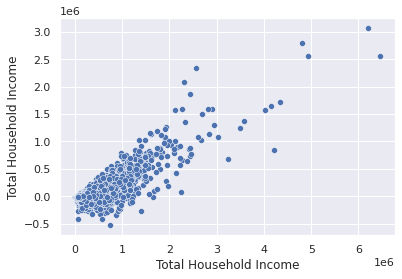

In [141]:
# Percebe-se que os resíduos de distribuem de maneiro linear, o que indica um problema no nosso modelo, mas não conseguimos tratá-lo
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

resid = y_test - y_pred

sns.scatterplot(y_test,resid)

#### Tentamos usar essa 'função' para remover as colunas irrelevantes para o modelo, mas depois de 20 minutos passados,desistimos da ideia.

In [134]:
# df_teste = df_treino_sem_outliers.copy()
# bandeira = True
# while bandeira:
#     X = df_teste.drop('Total Household Income',axis=1)
#     y = df_teste['Total Household Income']

#     x = sm.add_constant(X)
#     model_final = sm.OLS(y, x).fit()
    
#     p_values = model_final.pvalues
    
#     for i,v in zip(p_values.index,p_values.values):
#         tem_q_melhorar = 0
        
#         if v > 0.05 and i != 'const':
#             tem_q_melhorar += 1
#             df_teste.drop(i,axis=1,inplace=True)
#             break
        
#     if tem_q_melhorar == 0:
#         bandeira = False

In [135]:
# Tentamos criar um modelo usando apenas as colunas numéricas também
colunas_numericas = df.corr().columns
df_numericos = df[colunas_numericas].copy()
df_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Total Household Income                         41544 non-null  int64
 1   Total Food Expenditure                         41544 non-null  int64
 2   Agricultural Household indicator               41544 non-null  int64
 3   Bread and Cereals Expenditure                  41544 non-null  int64
 4   Total Rice Expenditure                         41544 non-null  int64
 5   Meat Expenditure                               41544 non-null  int64
 6   Total Fish and  marine products Expenditure    41544 non-null  int64
 7   Fruit Expenditure                              41544 non-null  int64
 8   Vegetables Expenditure                         41544 non-null  int64
 9   Restaurant and hotels Expenditure              41544 non-null  int64
 10

In [136]:
# Obtivemos um r2 ainda menor quando não levamos as coluns categóricas em consideração, obtendo um score de 0.812
X = df_numericos.drop('Total Household Income',axis=1)
y = df_numericos['Total Household Income']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

x = sm.add_constant(X_train)
model_initial = sm.OLS(y_train, x).fit()
model_initial.summary()

OLS Regression Results 
 
 Dep. Variable: Total Household Income R-squared: 0.812 
 
 
 Model: OLS Adj. R-squared: 0.811 
 
 
 Method: Least Squares F-statistic: 2843. 
 
 
 Date: Wed, 22 Dec 2021 Prob (F-statistic): 0.00 
 
 
 Time: 23:26:16 Log-Likelihood: -3.8263e+05 
 
 
 No. Observations: 29080 AIC: 7.653e+05 
 
 
 Df Residuals: 29035 BIC: 7.657e+05 
 
 
 Df Model: 44 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const -3.27e+04 4169.757 -7.842 0.000 -4.09e+04 -2.45e+04 
 
 
 Total Food Expenditure 0.5523 0.076 7.253 0.000 0.403 0.702 
 
 
 Agricultural Household indicator -5008.2987 1161.326 -4.313 0.000 -7284.550 -2732.047 
 
 
 Bread and Cereals Expenditure -0.1847 0.159 -1.165 0.244 -0.495 0.126 
 
 
 Total Rice Expenditure -0.1884 0.135 -1.399 0.162 -0.452 0.076 
 
 
 Meat Expenditure 0.1062 0.144 0.739 0.460 -0.175 0.388 
 
 
 Total Fish and marine products Expenditure 0.9752 0.146 6.671 0.000 0.689 1.262 
 
 
 Fruit Expenditure 0.0740 0.305 0.243 0.808 -0.524 0.672 
 
 
 Vegetables Expenditure -0.9541 0.303 -3.147 0.002 -1.548 -0.360 
 
 
 Restaurant and hotels Expenditure 0.1559 0.084 1.859 0.063 -0.008 0.320 
 
 
 Alcoholic Beverages Expenditure 0.5293 0.357 1.482 0.138 -0.171 1.229 
 
 
 Tobacco Expenditure -0.2773 0.195 -1.419 0.156 -0.660 0.106 
 
 
 Clothing, Footwear and Other Wear Expenditure 1.8215 0.137 13.298 0.000 1.553 2.090 
 
 
 Housing and water Expenditure 0.7770 0.044 17.519 0.000 0.690 0.864 
 
 
 Imputed House Rental Value 0.4035 0.051 7.876 0.000 0.303 0.504 
 
 
 Medical Care Expenditure 0.7728 0.028 27.324 0.000 0.717 0.828 
 
 
 Transportation Expenditure 1.0089 0.054 18.824 0.000 0.904 1.114 
 
 
 Communication Expenditure 4.8851 0.186 26.316 0.000 4.521 5.249 
 
 
 Education Expenditure 0.8927 0.039 22.840 0.000 0.816 0.969 
 
 
 Miscellaneous Goods and Services Expenditure 2.7652 0.061 45.544 0.000 2.646 2.884 
 
 
 Special Occasions Expenditure 1.2021 0.061 19.720 0.000 1.083 1.322 
 
 
 Crop Farming and Gardening expenses 0.0720 0.016 4.459 0.000 0.040 0.104 
 
 
 Total Income from Entrepreneurial Acitivites 0.6746 0.006 115.495 0.000 0.663 0.686 
 
 
 Household Head Age 578.7761 60.649 9.543 0.000 459.901 697.651 
 
 
 Total Number of Family members -4786.3716 756.704 -6.325 0.000 -6269.546 -3303.197 
 
 
 Members with age less than 5 year old 9255.3921 1477.901 6.263 0.000 6358.638 1.22e+04 
 
 
 Members with age 5 - 17 years old 1437.0612 890.693 1.613 0.107 -308.738 3182.861 
 
 
 Total number of family members employed 2.793e+04 816.918 34.191 0.000 2.63e+04 2.95e+04 
 
 
 House Floor Area 30.9576 15.457 2.003 0.045 0.661 61.255 
 
 
 House Age -72.5534 54.863 -1.322 0.186 -180.087 34.980 
 
 
 Number of bedrooms 3735.4199 832.081 4.489 0.000 2104.504 5366.336 
 
 
 Electricity -4017.9801 2719.378 -1.478 0.140 -9348.085 1312.124 
 
 
 Number of Television 2900.1982 1620.336 1.790 0.073 -275.734 6076.130 
 
 
 Number of CD/VCD/DVD -2111.2370 1601.925 -1.318 0.188 -5251.084 1028.610 
 
 
 Number of Component/Stereo set -2579.2164 2181.366 -1.182 0.237 -6854.793 1696.361 
 
 
 Number of Refrigerator/Freezer 2818.0817 1879.950 1.499 0.134 -866.706 6502.869 
 
 
 Number of Washing Machine -1828.1560 2025.641 -0.903 0.367 -5798.505 2142.193 
 
 
 Number of Airconditioner 2.222e+04 2291.069 9.697 0.000 1.77e+04 2.67e+04 
 
 
 Number of Car, Jeep, Van 1.966e+04 2879.560 6.828 0.000 1.4e+04 2.53e+04 
 
 
 Number of Landline/wireless telephones -1.395e+04 3131.768 -4.453 0.000 -2.01e+04 -7807.574 
 
 
 Number of Cellular phone 388.4341 704.915 0.551 0.582 -993.231 1770.099 
 
 
 Number of Personal Computer 1.119e+04 1408.437 7.947 0.000 8431.727 1.4e+04 
 
 
 Number of Stove with Oven/Gas Range 1.278e+04 2422.732 5.274 0.000 8028.889 1.75e+04 
 
 
 Number of Motorized Banca -7256.5114 5777.790 -1.256 0.209 -1.86e+04 4068.221 
 
 
 Number of Motorcycle/Tricycle 2725.5867 1471.886 1.852 0.064 -159.377 5610.550 
 
 
 
 
 Omnibus: 74561.231 Durbin-Watson: 1.

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Household Income', ylabel='Total Household Income'>

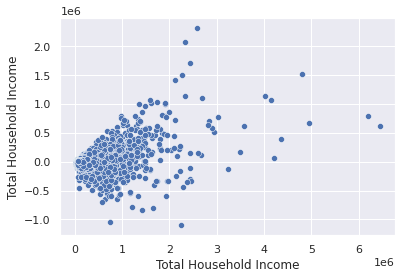

In [138]:
X = df_numericos.drop('Total Household Income',axis=1)
y = df_numericos['Total Household Income']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

resid = y_test - y_pred

sns.scatterplot(y_test,resid)